# Тестовоe задание на позицию junior-аналитика в Банк ВТБ

55:57

Из видео https://www.youtube.com/watch?v=vG6_1zIiuao от Simulative.  
Файлы: https://drive.google.com/drive/folders/13I9_shAO3Qtj04nKDB4q7FazAXKyMu_x

Задачи:
- [1](#1)
- [2](#2)
- [3](#3)
- [4](#4)
- [5](#5)

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql

In [2]:
with sql.connect('../data_ignored/database.db') as con:
    pl_df = pd.read_sql_query('SELECT * FROM pl', con=con)

pl_df.head()

,client_id,segment,period,product,pl
0,ZDosW1zUAi,Массовый,p_1,Кредит,9.018067
1,wVRHQ9hzrw,Массовый,p_1,Кредит,18.889585
2,6DZQIaOyL3,Массовый,p_1,Кредит,0.369257
3,jDwO0sMhL2,Массовый,p_1,Кредит,124.315319
4,FXIJUkgjLy,Массовый,p_1,Кредит,41.287831


In [3]:
with sql.connect('../data_ignored/database.db') as con:
    campaign = pd.read_sql_query('SELECT * FROM campaign', con=con)

campaign.head()

,client_id,product,response,manager_id
0,owOyJEIst9,Кредит,Согласие,CM_EiBeeRMhdA
1,HkhuPN1KG7,Кредит,Не обработано менеджером,CM_PzEEav4ic0
2,x1rEdC5fys,Кредит,Согласие,CM_RCwv1r0OHO
3,fx0acVADvj,Кредит,Согласие,CM_nJ7j5pAcMB
4,nDNNydkKQR,Кредит,Согласие,CM_EiBeeRMhdA


In [6]:
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92609 entries, 0 to 92608
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  92609 non-null  object 
 1   segment    92609 non-null  object 
 2   period     92609 non-null  object 
 3   product    92609 non-null  object 
 4   pl         92609 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.5+ MB


In [7]:
len(pl_df.groupby(['client_id', 'period', 'product']))

92609

Один и тот же клиент не может быть в 2 разных сегментах, но может быть в разных продуктах и периодах

In [8]:
pl_df.nunique()

client_id    24992
segment          3
period           2
product          5
pl           92609
dtype: int64

In [9]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   5000 non-null   object
 1   product     5000 non-null   object
 2   response    5000 non-null   object
 3   manager_id  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [10]:
campaign.nunique()

client_id     5000
product          1
response         5
manager_id      20
dtype: int64

In [25]:
campaign['product'].unique()

array(['Кредит'], dtype=object)

Рекламная кампания проводилась только по продукту "Кредит"

#### 1
Посчитать средний ЧОД по продуктам и количество клиентов с продуктом для каждого сегмента в разрезе периодов.

In [4]:
pl_df.groupby(['segment', 'product', 'period']).agg({'pl': 'mean', 'client_id': 'count'})

pl  client_id
segment     product          period                       
Верхний     Банковская карта p_1      60.571545         49
                             p_2      51.770009        167
            Депозит          p_1     112.474520        254
                             p_2      99.260623        283
            Кредит           p_1     236.938710        360
                             p_2     248.191513        548
            РКО              p_1      22.847632       1149
                             p_2      22.064079       1162
            Эквайринг        p_1      80.517184        183
                             p_2      72.968866        284
Массовый    Банковская карта p_1      13.310203        895
                             p_2      11.726557       2636
            Депозит          p_1      28.747545       3537
                             p_2      25.219855       4345
            Кредит           p_1      59.219407       5247
                             p_2      67.109774       7845
            РКО              p_1       5.795114      16728
                             p_2       5.566726      16700
            Эквайринг        p_1      19.627608       2625
                             p_2      17.348344       4424
Стандартный Банковская карта p_1      26.421616        338
                             p_2      22.436106        917
            Депозит          p_1      60.994262       1292
                             p_2      49.332790       1570
            Кредит           p_1     120.101219       1871
                             p_2     131.611788       2871
            РКО              p_1      11.418812       5907
                             p_2      10.983568       5870
            Эквайринг        p_1      39.329551        962
                             p_2      35.046014       1590

In [5]:
pl_df.pivot_table(['pl', 'client_id'], ['segment', 'product'], 'period', aggfunc=['mean', 'count'])

mean                 count                \
                                      pl             client_id            pl   
period                               p_1         p_2       p_1    p_2    p_1   
segment     product                                                            
Верхний     Банковская карта   60.571545   51.770009        49    167     49   
            Депозит           112.474520   99.260623       254    283    254   
            Кредит            236.938710  248.191513       360    548    360   
            РКО                22.847632   22.064079      1149   1162   1149   
            Эквайринг          80.517184   72.968866       183    284    183   
Массовый    Банковская карта   13.310203   11.726557       895   2636    895   
            Депозит            28.747545   25.219855      3537   4345   3537   
            Кредит             59.219407   67.109774      5247   7845   5247   
            РКО                 5.795114    5.566726     16728  16700  16728   
            Эквайринг          19.627608   17.348344      2625   4424   2625   
Стандартный Банковская карта   26.421616   22.436106       338    917    338   
            Депозит            60.994262   49.332790      1292   1570   1292   
            Кредит            120.101219  131.611788      1871   2871   1871   
            РКО                11.418812   10.983568      5907   5870   5907   
            Эквайринг          39.329551   35.046014       962   1590    962   

                                     
                                     
period                          p_2  
segment     product                  
Верхний     Банковская карта    167  
            Депозит             283  
            Кредит              548  
            РКО                1162  
            Эквайринг           284  
Массовый    Банковская карта   2636  
            Депозит            4345  
            Кредит             7845  
            РКО               16700  
            Эквайринг          4424  
Стандартный Банковская карта    917  
            Депозит            1570  
            Кредит             2871  
            РКО                5870  
            Эквайринг          1590

In [6]:
pl_df.pivot_table(['pl', 'client_id'], ['segment', 'product'], 'period', aggfunc={'pl': ['mean', 'sum'], 'client_id': 'count'})

client_id                 pl              \
                                 count               mean               
period                             p_1    p_2         p_1         p_2   
segment     product                                                     
Верхний     Банковская карта        49    167   60.571545   51.770009   
            Депозит                254    283  112.474520   99.260623   
            Кредит                 360    548  236.938710  248.191513   
            РКО                   1149   1162   22.847632   22.064079   
            Эквайринг              183    284   80.517184   72.968866   
Массовый    Банковская карта       895   2636   13.310203   11.726557   
            Депозит               3537   4345   28.747545   25.219855   
            Кредит                5247   7845   59.219407   67.109774   
            РКО                  16728  16700    5.795114    5.566726   
            Эквайринг             2625   4424   19.627608   17.348344   
Стандартный Банковская карта       338    917   26.421616   22.436106   
            Депозит               1292   1570   60.994262   49.332790   
            Кредит                1871   2871  120.101219  131.611788   
            РКО                   5907   5870   11.418812   10.983568   
            Эквайринг              962   1590   39.329551   35.046014   

                                                            
                                        sum                 
period                                  p_1            p_2  
segment     product                                         
Верхний     Банковская карта    2968.005722    8645.591583  
            Депозит            28568.528169   28090.756271  
            Кредит             85297.935527  136008.949279  
            РКО                26251.929445   25638.459448  
            Эквайринг          14734.644751   20723.157814  
Массовый    Банковская карта   11912.631687   30911.203026  
            Депозит           101680.067703  109580.268403  
            Кредит            310724.231052  526476.177132  
            РКО                96940.659699   92964.322441  
            Эквайринг          51522.470650   76749.072807  
Стандартный Банковская карта    8930.506181   20573.908977  
            Депозит            78804.586529   77452.480043  
            Кредит            224709.381560  377857.442886  
            РКО                67450.919956   64473.542687  
            Эквайринг          37835.028014   55723.162104

In [13]:
pl_df.pivot_table('pl', ['segment', 'product'], 'period').style.background_gradient()

In [8]:
pl_df.pivot_table(['pl', 'client_id'], ['segment', 'product'], 'period', aggfunc={'pl': ['mean', 'sum'], 'client_id': 'count'}).style.background_gradient()

In [12]:
# код из видео
(
    pl_df
    .groupby(['segment', 'period', 'product'])
    .agg({
        'pl': [('mean_pl', 'mean')],  # квадратные скобки обязательны
        'client_id': [('unique_clients', 'nunique')]  # вдруг один пользователь 3 кредита взял
    })
    .droplevel(0, axis=1)  # автоматический заголовок нам не нужен - мы свой создали
    .reset_index()
    .head()
)

,segment,period,product,mean_pl,unique_clients
0,Верхний,p_1,Банковская карта,60.571545,49
1,Верхний,p_1,Депозит,112.474520,254
2,Верхний,p_1,Кредит,236.938710,360
3,Верхний,p_1,РКО,22.847632,1149
4,Верхний,p_1,Эквайринг,80.517184,183


In [10]:
(
    pl_df
    .groupby(['segment', 'period', 'product'])
    .agg(
        mean_pl = ('pl', 'mean'),  # другой синтаксис для своих названий столбиков
        unique_clients = ('client_id', 'nunique')
    )
    .reset_index()
    .head()
)

,segment,period,product,mean_pl,unique_clients
0,Верхний,p_1,Банковская карта,60.571545,49
1,Верхний,p_1,Депозит,112.474520,254
2,Верхний,p_1,Кредит,236.938710,360
3,Верхний,p_1,РКО,22.847632,1149
4,Верхний,p_1,Эквайринг,80.517184,183


In [16]:
# код из видео
(
    pl_df
    .groupby(['segment', 'period', 'product'])
    .agg({
        'pl': [('mean_pl', 'mean')],  # квадратные скобки обязательны
        'client_id': [('unique_clients', 'nunique')]  # вдруг один пользователь 3 кредита взял
    })
    .droplevel(0, axis=1)  # автоматический заголовок нам не нужен - мы свой создали
    .reset_index()
    .pivot_table(['mean_pl', 'unique_clients'], ['segment', 'period'], 'product')
)

mean_pl                                     \
product            Банковская карта     Депозит      Кредит        РКО   
segment     period                                                       
Верхний     p_1           60.571545  112.474520  236.938710  22.847632   
            p_2           51.770009   99.260623  248.191513  22.064079   
Массовый    p_1           13.310203   28.747545   59.219407   5.795114   
            p_2           11.726557   25.219855   67.109774   5.566726   
Стандартный p_1           26.421616   60.994262  120.101219  11.418812   
            p_2           22.436106   49.332790  131.611788  10.983568   

                                unique_clients                                  
product             Эквайринг Банковская карта Депозит Кредит    РКО Эквайринг  
segment     period                                                              
Верхний     p_1     80.517184               49     254    360   1149       183  
            p_2     72.968866              167     283    548   1162       284  
Массовый    p_1     19.627608              895    3537   5247  16728      2625  
            p_2     17.348344             2636    4345   7845  16700      4424  
Стандартный p_1     39.329551              338    1292   1871   5907       962  
            p_2     35.046014              917    1570   2871   5870      1590

In [22]:
# sql вариант запроса
query = (
    'SELECT \
        segment, \
        period, \
        product, \
        AVG(pl) mean_pl, \
        COUNT(DISTINCT client_id) unique_clients \
    FROM \
        pl \
    GROUP BY \
        segment, \
        period, \
        product \
    '
)

with sql.connect('../data_ignored/database.db') as con:
    pl_df = pd.read_sql_query(
        query
        , con=con)

pl_df

,segment,period,product,mean_pl,unique_clients
0,Верхний,p_1,Банковская карта,60.571545,49
1,Верхний,p_1,Депозит,112.474520,254
2,Верхний,p_1,Кредит,236.938710,360
3,Верхний,p_1,РКО,22.847632,1149
4,Верхний,p_1,Эквайринг,80.517184,183
5,Верхний,p_2,Банковская карта,51.770009,167
6,Верхний,p_2,Депозит,99.260623,283
7,Верхний,p_2,Кредит,248.191513,548
8,Верхний,p_2,РКО,22.064079,1162
9,Верхний,p_2,Эквайринг,72.968866,284


#### 2
Посчитать средний ЧОД и количество клиентов в каждом сегменте в разрезе периодов.

In [9]:
pl_df.pivot_table(['pl', 'client_id'], 'segment', 'period', aggfunc={'pl': 'mean', 'client_id': 'count'}).style.background_gradient()

In [6]:
# код из видео
(
    pl_df
    .groupby(['segment', 'period'])
    .agg({
        'pl': [('mean_pl', 'mean')],  # квадратные скобки обязательны
        'client_id': [('unique_clients', 'nunique')]  # вдруг один пользователь 3 кредита взял
    })
    .droplevel(0, axis=1)  # автоматический заголовок нам не нужен - мы свой создали
    .reset_index()
    .pivot_table(['mean_pl', 'unique_clients'], 'segment', 'period')
)

mean_pl            unique_clients       
period             p_1        p_2            p_1    p_2
segment                                                
Верхний      79.108293  89.650947           1195   1206
Массовый     19.729266  23.273464          17207  17330
Стандартный  40.282587  46.503397           6061   6110

не подумал об уникальности клиентов

#### 3
Оценить отток клиентов с продуктов в периоде p_2

In [4]:
pt = pl_df.pivot_table('segment', ['product', 'client_id'], 'period', aggfunc='count', )

In [5]:
pt.head()

period                       p_1  p_2
product          client_id           
Банковская карта 00JURPZFUt  NaN  1.0
                 02O7Rlu7J8  1.0  NaN
                 02Uko8TXvH  1.0  NaN
                 03rEoXgXxH  1.0  NaN
                 05iexPlQKC  1.0  NaN

In [6]:
pt[pt.p_1.notna() & pt.p_2.isna()]\
.reset_index()\
.groupby('product')\
.agg('count')\
.iloc[:, :1]\
.rename(columns={'client_id': 'retention'})
# надо ж было долю посчитать, а не абсолютное значение. Да еще и по всем продуктам

period,retention
product,
Банковская карта,1079
Депозит,3824
Кредит,4084
РКО,1207
Эквайринг,2785


Ниже код из видео, иногда с моими коррективами

In [10]:
df3 = (
    pl_df[pl_df['period'] == 'p_1']
    .merge(
        pl_df[pl_df['period'] == 'p_2'], 
        how = 'left', 
        left_on = ['client_id', 'product'], 
        right_on = ['client_id', 'product'], 
        suffixes = ['_p1', '_p2']
    )
)
df3.head()

,client_id,segment_p1,period_p1,product,pl_p1,segment_p2,period_p2,pl_p2
0,ZDosW1zUAi,Массовый,p_1,Кредит,9.018067,NaN,NaN,NaN
1,wVRHQ9hzrw,Массовый,p_1,Кредит,18.889585,NaN,NaN,NaN
2,6DZQIaOyL3,Массовый,p_1,Кредит,0.369257,NaN,NaN,NaN
3,jDwO0sMhL2,Массовый,p_1,Кредит,124.315319,NaN,NaN,NaN
4,FXIJUkgjLy,Массовый,p_1,Кредит,41.287831,Массовый,p_2,2.430823


In [15]:
lost_clients = df3[df3.segment_p2.isna()][['client_id', 'product']].drop_duplicates().shape[0]
lost_clients

12979

In [14]:
## мы считаем оттоком когда клиент перестал пользоваться данной категорией продукта?
## Тогда и переход в другой продукт для нас - отток. 
## Правильно ли так считать для банка в целом, а не для подразделений?
df3[df3.segment_p2.isna()]['client_id'].drop_duplicates().shape[0]

10631

In [16]:
all_clients = df3[['client_id', 'product']].drop_duplicates().shape[0]
all_clients

41397

In [17]:
f"{round(100 * lost_clients / all_clients, 2)}%"

'31.35%'

Посмотрю уникальность клиентов

In [33]:
pt = pl_df.pivot_table('segment', ['product', 'client_id'], 'period', aggfunc='count', )

In [34]:
pt.head()

period                       p_1  p_2
product          client_id           
Банковская карта 00JURPZFUt  NaN  1.0
                 02O7Rlu7J8  1.0  NaN
                 02Uko8TXvH  1.0  NaN
                 03rEoXgXxH  1.0  NaN
                 05iexPlQKC  1.0  NaN

In [35]:
pt2 = pt.reset_index()
pt2.head()

period,product,client_id,p_1,p_2
0,Банковская карта,00JURPZFUt,NaN,1.0
1,Банковская карта,02O7Rlu7J8,1.0,NaN
2,Банковская карта,02Uko8TXvH,1.0,NaN
3,Банковская карта,03rEoXgXxH,1.0,NaN
4,Банковская карта,05iexPlQKC,1.0,NaN


In [10]:
pt2.groupby('product').agg(['count', 'nunique'])['client_id']

,count,nunique
product,,
Банковская карта,4799,4799
Депозит,10022,10022
Кредит,15348,15348
РКО,24939,24939
Эквайринг,9083,9083


В рамках одного продукта любой клиент присутствуе лишь раз.  
Тогда посчитаем отток клиентов по каждому продукту отдельно в %%.

In [11]:
retention = pt[pt.p_1.notna() & pt.p_2.isna()]\
.reset_index()\
.groupby('product')\
.agg('count')\
.iloc[:, :1]\
.rename(columns={'client_id': 'retention'})

retention

period,retention
product,
Банковская карта,1079
Депозит,3824
Кредит,4084
РКО,1207
Эквайринг,2785


In [12]:
clients_number = pt[pt.p_1.notna()]\
.reset_index()\
.groupby('product')\
.agg('count')\
.iloc[:, :1]\
.rename(columns={'client_id': 'retention'})

clients_number

period,retention
product,
Банковская карта,1282
Депозит,5083
Кредит,7478
РКО,23784
Эквайринг,3770


In [22]:
round(100 * retention / clients_number)

period,retention
product,
Банковская карта,84.0
Депозит,75.0
Кредит,55.0
РКО,5.0
Эквайринг,74.0


In [28]:
pt2.client_id.count(), pt2.client_id.nunique()

(64191, 24992)

а вот в рамках всего банка клиент присутствует несколько раз: в разных продуктах.  
Посчитаем отток клиентов в банке в целом:

In [27]:
total_clients_number = pt[pt.p_1.notna()]\
.reset_index()\
.client_id\
.nunique()

total_clients_number

24463

In [29]:
bank_retention = pt[pt.p_1.notna() & pt.p_2.isna()]\
.reset_index()\
.client_id\
.nunique()

bank_retention

10631

In [31]:
f"{round(100 * bank_retention / total_clients_number)}%"

'43%'

#### 4
Посчитать сумму ЧОД, привлеченную каждым менеджером в ходе маркетинговой кампании

In [18]:
df_merge = pl_df.merge(campaign)
df_merge.head()

,client_id,segment,period,product,pl,response,manager_id
0,XHgfHt3boG,Массовый,p_2,Кредит,35.244275,Согласие,CM_RCwv1r0OHO
1,sujQEPdgvp,Массовый,p_2,Кредит,121.858601,Не обработано менеджером,CM_lKxhD73Z6d
2,XRre8Aj7GK,Массовый,p_2,Кредит,43.220162,Недозвон,CM_c28lGRRaEI
3,faWYjccoeJ,Массовый,p_2,Кредит,6.691619,Согласие,CM_6ofody41cY
4,9k7VeLIbKU,Массовый,p_2,Кредит,22.162824,Согласие,CM_pMFgOhtUKD


In [25]:
df_merge.groupby('manager_id').pl.agg('sum').sort_values(ascending=False)

manager_id
CM_2755B4KTu4    22201.541290
CM_pMFgOhtUKD    20355.146751
CM_wjb2ArrpAw    19834.757303
CM_c28lGRRaEI    19565.680861
CM_gHP4ykbzTj    19539.450154
CM_R7BdTh0Svt    19518.652917
CM_6ofody41cY    19181.096090
CM_doxY9cvELI    19058.722925
CM_PzEEav4ic0    18478.955276
CM_lKxhD73Z6d    18366.204638
CM_eE0WMK1vVW    17996.289290
CM_onY6ha8qHv    17841.507248
CM_fQHTUUUkXc    17786.466100
CM_EiBeeRMhdA    17660.461325
CM_RCwv1r0OHO    17656.530108
CM_70HjN0EVqf    17602.269745
CM_zShYeVNFi0    17597.410380
CM_9vMKq9aqw9    16440.848277
CM_nJ7j5pAcMB    15828.418450
CM_dcTdLjqH2x    15266.406230
Name: pl, dtype: float64

Ниже вариант из видео.  
pl надо было считать только в случае согласия клиента!  
И объединять надо по 2 полям: client_id и product. Иначе мы мержим клиента, пользующегося несколькими продуктами с самим собой?

In [7]:
campaign_sales = campaign[campaign.response == 'Согласие']

In [ ]:
sales_in_p2 = pl_df[pl_df.period == 'p_2']

In [12]:
(
    campaign_sales
    .merge(
        sales_in_p2, 
        how='inner', 
        left_on=['client_id', 'product'], 
        right_on=['client_id', 'product'])
    .groupby('manager_id')['pl']
    .agg({'sum'})
)

,sum
manager_id,
CM_2755B4KTu4,16600.098122
CM_6ofody41cY,13407.509851
CM_70HjN0EVqf,11831.278026
CM_9vMKq9aqw9,11080.970431
CM_EiBeeRMhdA,12820.881592
CM_PzEEav4ic0,12933.254512
CM_R7BdTh0Svt,14119.009958
CM_RCwv1r0OHO,12056.911018
CM_c28lGRRaEI,13358.891157


#### 5
Оценить эффективность маркетинговой кампании

In [12]:
pl_df.client_id.nunique()

24992

In [13]:
campaign.client_id.nunique()

5000

In [20]:
campaign.response.unique()

array(['Согласие', 'Не обработано менеджером', 'Недозвон', 'Перезвонить',
       'Отказ'], dtype=object)

Доля клиентов, взявших кредит, в рамках маркетинговой кампании

In [18]:
campaign[campaign.response == 'Согласие'].client_id.nunique() / campaign.client_id.nunique()

0.5632

In [27]:
pl_df[pl_df.period == 'p_1'].merge(campaign, left_on='client_id', right_on='client_id').nunique()

client_id     4842
segment          3
period           1
product_x        4
pl            6763
product_y        1
response         5
manager_id      20
dtype: int64

Я думал, что клиентов из первого периода в кампании стали обзванивать и предлагать кредит, но есть 158 клиентов, которые не были с нами в первом периоде.  
Как тогда измерить эффективность кампании в сравнении с клиентами, которые в кампанию не попали?

In [40]:
(pl_df[pl_df['product'] == 'Кредит'].client_id.nunique()
 - campaign[campaign.response == 'Согласие'].client_id.nunique()) / (pl_df.client_id.nunique() 
   - campaign.client_id.nunique())

0.6268507402961184

? те, кому не рекламировали взяли кредитов больше?

Ниже вариант из видео с некоторыми моими корректировками.

In [6]:
# сравнение продаж за 2 периода
pl_df.groupby('period')['pl'].agg('sum')

period
p_1    1.148332e+06
p_2    1.651868e+06
Name: pl, dtype: float64

In [8]:
## количество разных response
responses = campaign.groupby('response')['manager_id'].agg('count')
responses

response
Не обработано менеджером     484
Недозвон                     749
Отказ                        717
Перезвонить                  234
Согласие                    2816
Name: manager_id, dtype: int64

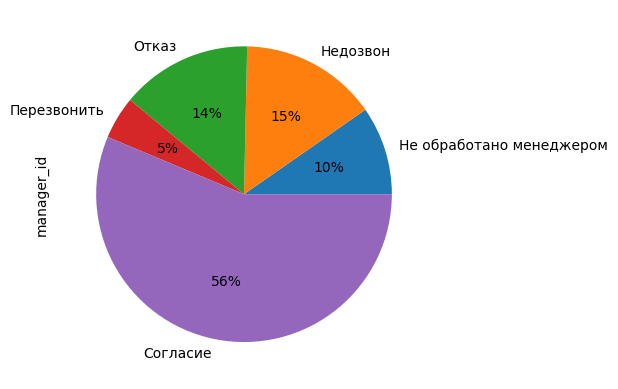

In [11]:
responses.plot.pie(autopct='%1.0f%%');

In [13]:
## доля давших согласие в кампании
campaign[campaign['response'] == 'Согласие']['client_id'].nunique() / campaign['client_id'].nunique()

0.5632

In [4]:
sales_in_p1 = pl_df[pl_df.period == 'p_1']
sales_in_p1.sample(5)

,client_id,segment,period,product,pl
10924,xWCnKEwxmi,Верхний,p_1,РКО,24.348507
9071,t8DUkc8HEd,Массовый,p_1,РКО,0.425584
18416,XKyDE1uU29,Верхний,p_1,РКО,15.706107
12890,493ZuvSbzV,Массовый,p_1,РКО,16.844623
15043,7VxGG9sdPr,Массовый,p_1,РКО,9.227170


In [ ]:
campaign_sales = campaign[campaign.response == 'Согласие']

In [12]:
## скольким клиентам из первого периода мы допродали кредит во втором
sales_in_p1[sales_in_p1.client_id.isin(campaign_sales.client_id.unique())].shape[0] / sales_in_p1.client_id.nunique()

0.15513224052650942

Снова мой код

In [4]:
pl_df.head(1)

,client_id,segment,period,product,pl
0,ZDosW1zUAi,Массовый,p_1,Кредит,9.018067


In [5]:
campaign.head(1)

,client_id,product,response,manager_id
0,owOyJEIst9,Кредит,Согласие,CM_EiBeeRMhdA
